In [2]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

# Objective

### In order to find which factors contribute to property value, we will look at the correlation between different nuisances like airport noise or power lines.

# Airport Noise

The parcel database contains the airport noise information, so we'll start by importing sale and parcel csv's.

In [3]:
sale=pd.read_csv(data_folder+'EXTR_RPSale_final.csv',dtype={'PIN':'string'})
parcel=pd.read_csv(data_folder+'EXTR_Parcel_final.csv',dtype={'PIN':'string'})

df = pd.merge(sale, parcel, on='PIN', how='inner')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28771 entries, 0 to 28770
Columns: 108 entries, Unnamed: 0_x to OtherProblems
dtypes: bool(1), float64(4), int64(52), object(50), string(1)
memory usage: 23.7+ MB


Now we'll compare just the airport noise column and the sale price. First let's look at the airport noise column

In [7]:
df.AirportNoise.describe()

count    28771.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: AirportNoise, dtype: float64

# Traffic Noise

None of our homes suffer from airport noise. Let's check traffic.

In [8]:
df.TrafficNoise.describe()

count    28771.000000
mean         0.205102
std          0.559640
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: TrafficNoise, dtype: float64

Some suffer from traffic noise. Let's see how many.

In [10]:
df[df['TrafficNoise']>0]

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
3,3,3015264,124550,98,2019-09-27,193000,20191015000395,,,,...,N,N,N,N,N,N,N,N,N,N
15,15,2972836,292205,9091,2019-02-01,400000,,,,,...,N,N,N,N,N,N,N,N,N,N
17,17,2986074,668990,20,2019-04-30,780000,20190503001148,,,,...,N,N,N,N,N,N,N,N,N,N
36,36,2992999,407320,60,2019-06-05,1495000,20190611001065,,,,...,N,N,N,N,N,N,N,N,N,N
37,37,3004196,232205,9119,2019-08-01,590000,20190809001070,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28729,28729,2996393,675250,10,2019-06-24,1820000,20190628000406,,,,...,N,N,N,N,N,N,N,N,N,N
28737,28737,3025378,221300,45,2019-12-09,1075000,20191213000586,,,,...,N,N,N,N,N,N,N,N,N,N
28753,28753,3017740,386040,235,2019-10-23,1100000,20191029000733,,,,...,N,N,N,N,N,N,N,N,N,N
28759,28759,3004977,572750,100,2019-05-08,3900,20190815000438,,,,...,N,N,N,N,N,N,N,N,N,N


Maybe we can compare the median home value of homes with traffic vs homes without.

In [11]:
traffic = df[df['TrafficNoise']>0]
no_traffic = df[df['TrafficNoise']==0]

#### Median of home sale price between homes with no traffic noise and homes with traffic noise

In [21]:
tr_med = traffic.SalePrice.median()
no_tr_med = no_traffic.SalePrice.median()

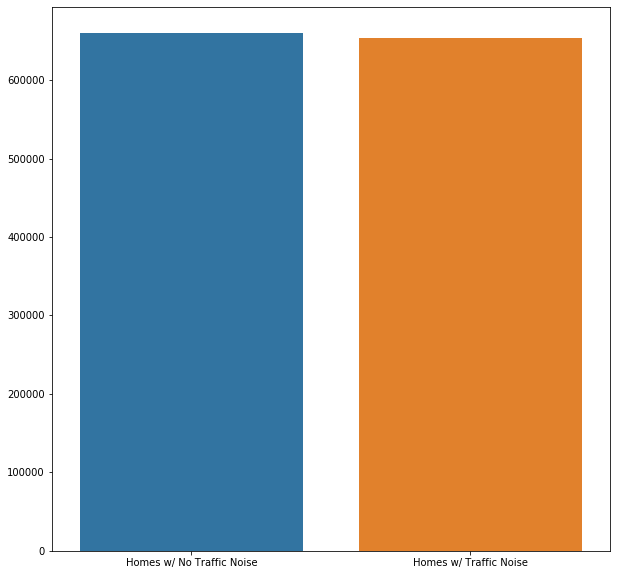

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x=['Homes w/ No Traffic Noise', 'Homes w/ Traffic Noise'],y=[no_tr_med, tr_med], ax=ax)

#### Median of home sale price between homes with no traffic noise and homes with traffic noise

Out of curiosity, we'll check the mean, though this will likely be skewed because of the size difference between the data sets.

In [24]:
tr_mean = traffic.SalePrice.mean()
no_tr_mean = no_traffic.SalePrice.mean()

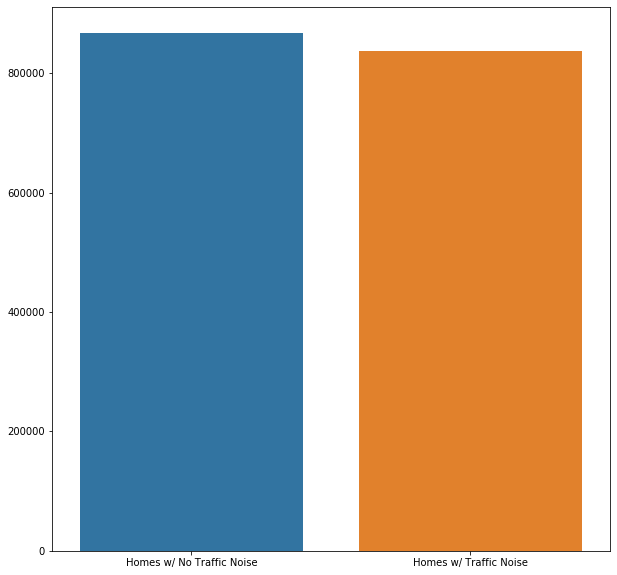

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x=['Homes w/ No Traffic Noise', 'Homes w/ Traffic Noise'],y=[no_tr_mean, tr_mean], ax=ax)

### I realized I forgot to remove outliers. Let's see how that effects the findings.

In [27]:
z = np.abs(stats.zscore(df.SalePrice))
no_outliers = df[z < 3]

no_outliers

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,0,3027422,213043,120,2019-12-20,560000,20191226000848,,,,...,N,N,N,N,N,N,N,N,N,N
1,1,3002257,940652,630,2019-07-22,435000,20190730001339,,,,...,N,N,N,N,N,N,N,N,N,N
2,2,2993601,140281,20,2019-06-04,450000,20190614000489,,,,...,N,N,N,N,N,N,N,N,N,N
3,3,3015264,124550,98,2019-09-27,193000,20191015000395,,,,...,N,N,N,N,N,N,N,N,N,N
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28766,28766,2972689,929085,760,2019-01-25,1205000,20190206001611,,,,...,N,N,N,N,N,N,N,N,N,N
28767,28767,2992593,405940,95,2019-05-21,442000,20190607001670,,,,...,N,N,N,N,N,N,N,N,N,N
28768,28768,3003079,381670,25,2019-07-22,680000,20190802000628,,,,...,N,N,N,N,N,N,N,N,N,N
28769,28769,3025068,615020,505,2019-11-18,745000,20191212000602,,,,...,N,N,N,N,N,N,N,N,N,N


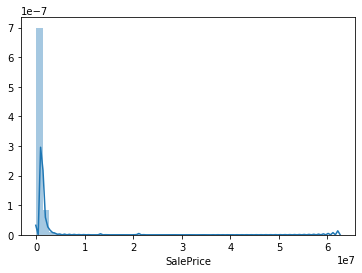

In [30]:
sns.distplot(df.SalePrice)

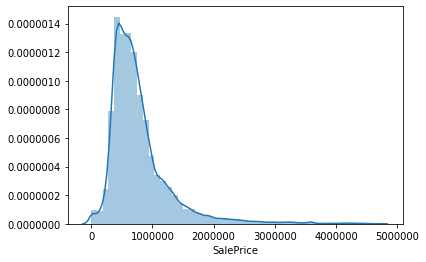

In [29]:
sns.distplot(no_outliers.SalePrice)

#### Median of home sale price between homes with no traffic noise and homes with traffic noise

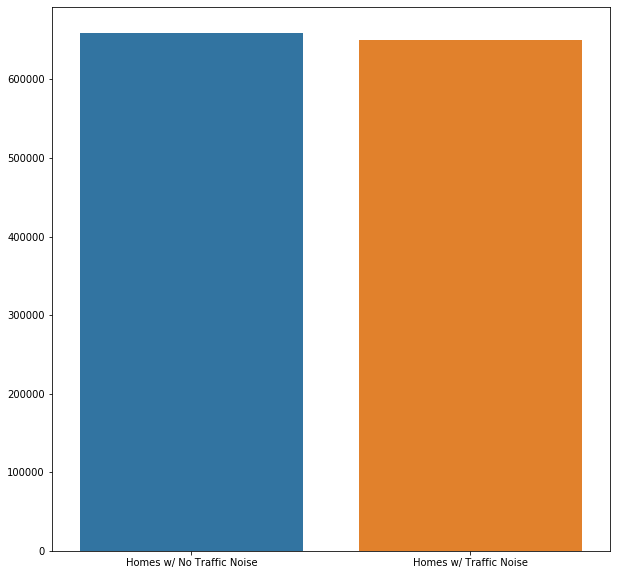

In [33]:
traffic = no_outliers[no_outliers['TrafficNoise']>0]
no_traffic = no_outliers[no_outliers['TrafficNoise']==0]

tr_med = traffic.SalePrice.median()
no_tr_med = no_traffic.SalePrice.median()

fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x=['Homes w/ No Traffic Noise', 'Homes w/ Traffic Noise'],y=[no_tr_med, tr_med], ax=ax)

#### Mean of home sale price between homes with no traffic noise and homes with traffic noise

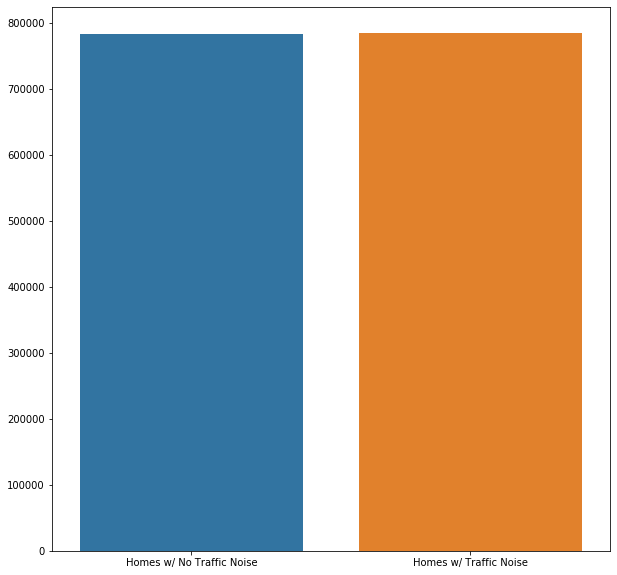

In [34]:
tr_mean = traffic.SalePrice.mean()
no_tr_mean = no_traffic.SalePrice.mean()

fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x=['Homes w/ No Traffic Noise', 'Homes w/ Traffic Noise'],y=[no_tr_mean, tr_mean], ax=ax)

Let's look at the distributions for each:

Text(0.5, 1.0, 'No Traffic Noise')

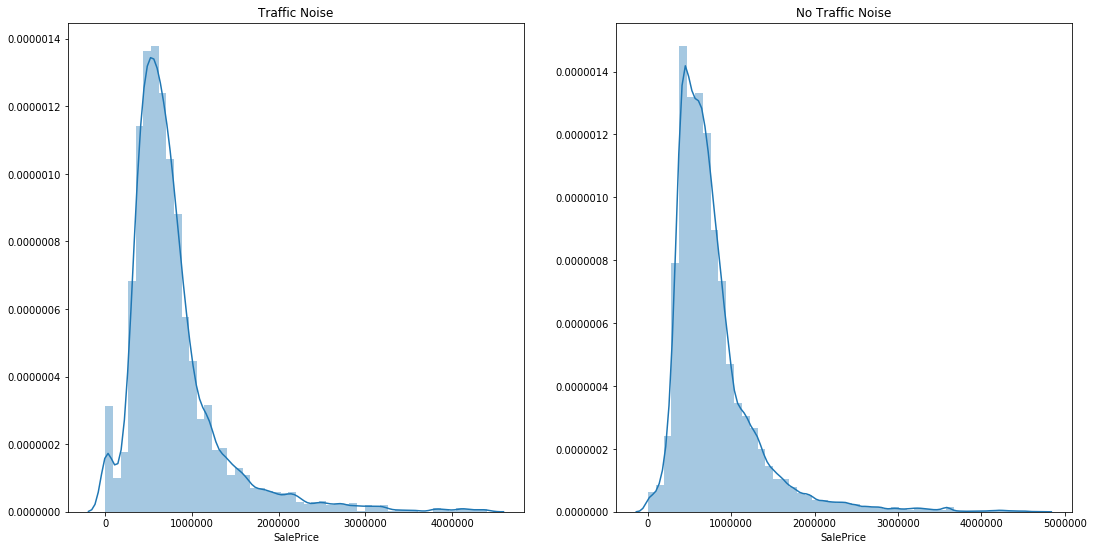

In [46]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

sns.distplot(traffic.SalePrice, ax=ax[0])
ax[0].set_title('Traffic Noise')
sns.distplot(no_traffic.SalePrice, ax=ax[1])
ax[1].set_title('No Traffic Noise')

### threshold

Looking at the look up table, traffic noises are recorded as follows:


0. no traffic noise
1. moderate noise level
2. high noise level 
3. extreme noise level

By this standard, I will try looking only at homes with a 2 or higher.

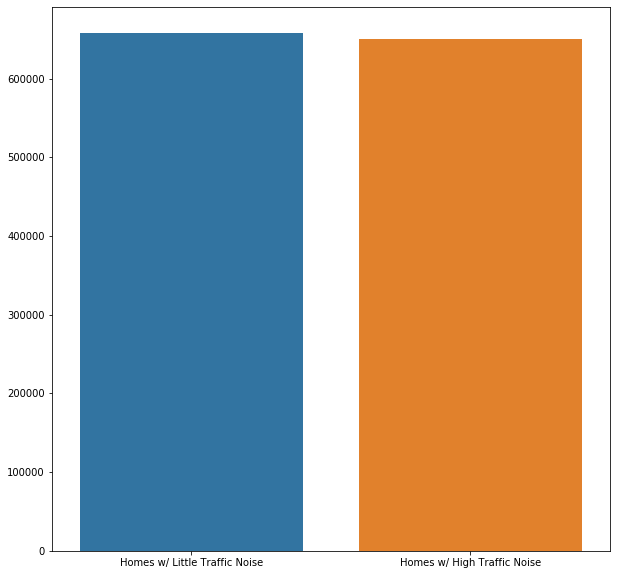

In [47]:
hi_noise = no_outliers[no_outliers.TrafficNoise>=2]
little_noise = no_outliers[no_outliers.TrafficNoise<2]

hi_noise_med = hi_noise.SalePrice.median()
little_noise_med = little_noise.SalePrice.median()

fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x=['Homes w/ Little Traffic Noise', 'Homes w/ High Traffic Noise'],y=[little_noise_med, hi_noise_med], ax=ax)

Text(0.5, 1.0, 'Little Traffic Noise')

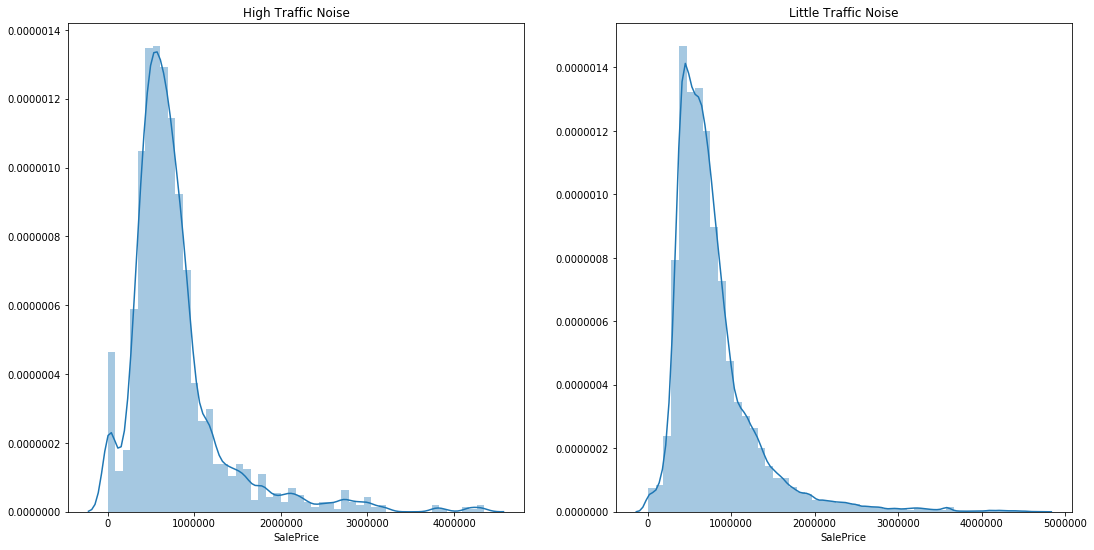

In [48]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

sns.distplot(hi_noise.SalePrice, ax=ax[0])
ax[0].set_title('High Traffic Noise')
sns.distplot(little_noise.SalePrice, ax=ax[1])
ax[1].set_title('Little Traffic Noise')

What's the size of these data sets?

In [49]:
print(len(little_noise))
print(len(hi_noise))

26936
1656


### And now only looking at extreme noise levels.

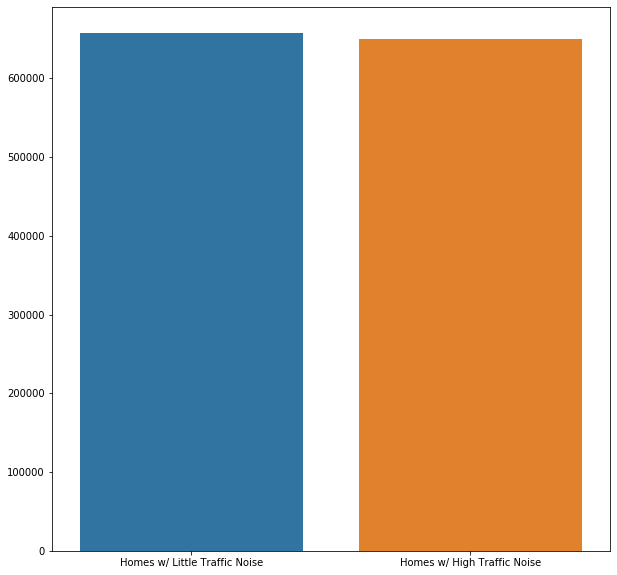

In [53]:
extreme_noise = no_outliers[no_outliers.TrafficNoise==3]
little_noise = no_outliers[no_outliers.TrafficNoise<3]

extreme_noise_med = extreme_noise.SalePrice.median()
little_noise_med = little_noise.SalePrice.median()

fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x=['Homes w/ Little Traffic Noise', 'Homes w/ Extreme Traffic Noise'],y=[little_noise_med, extreme_noise_med], ax=ax)

Text(0.5, 1.0, 'Little Traffic Noise')

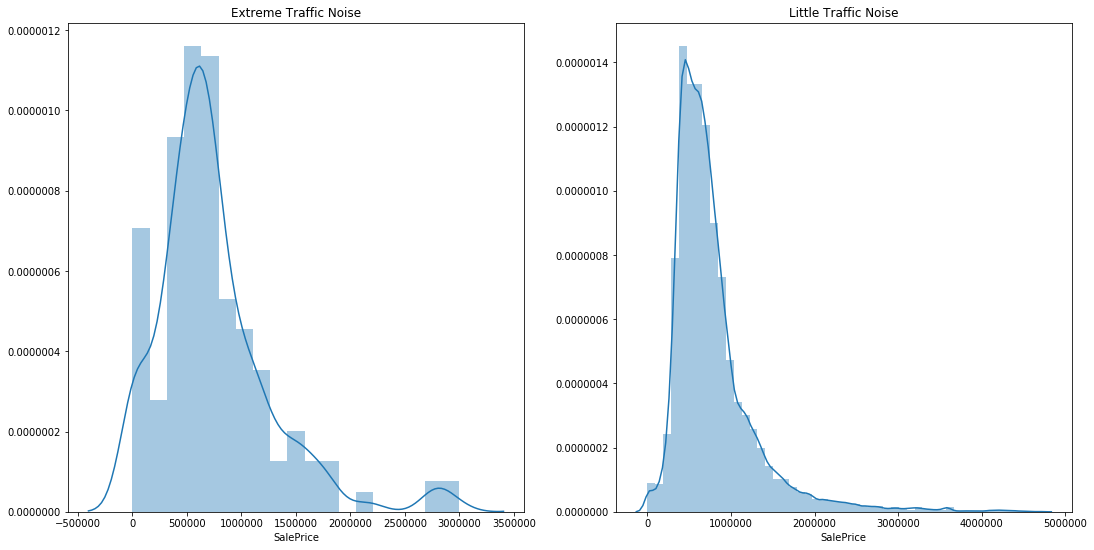

In [54]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

sns.distplot(extreme_noise.SalePrice, ax=ax[0])
ax[0].set_title('Extreme Traffic Noise')
sns.distplot(little_noise.SalePrice, ax=ax[1])
ax[1].set_title('Little Traffic Noise')

#### Size

In [55]:
print(len(little_noise))
print(len(extreme_noise))

28341
251


# Power lines

Does the presence of Power Lines affect home value?

In [35]:
no_outliers.PowerLines.describe()

count     28592
unique        2
top           N
freq      28289
Name: PowerLines, dtype: object

In [36]:
no_outliers.PowerLines.unique()

array(['N', 'Y'], dtype=object)

Above I show that there are two possible values for the powerline column, Y and N. If we assume Y and N mean yes and no, then we'll split the data into those two groups, take the median house value, and see if there is a difference.

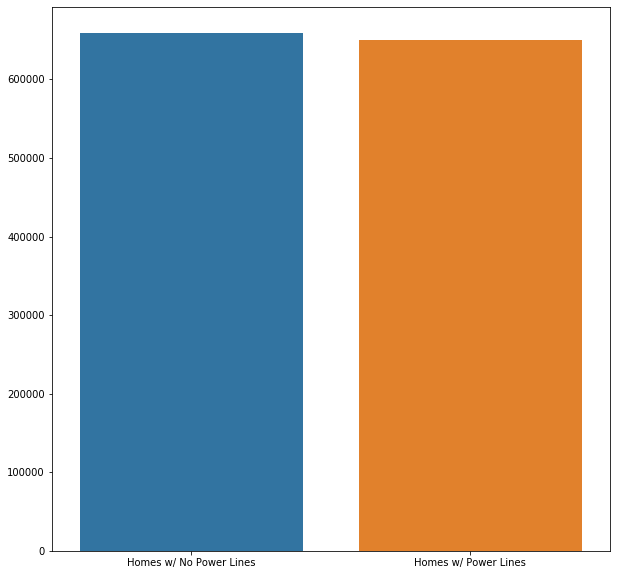

In [37]:
pl = no_outliers[no_outliers['PowerLines'] == 'Y']
no_pl = no_outliers[no_outliers['PowerLines'] == 'N']

pl_med = traffic.SalePrice.median()
no_pl_med = no_traffic.SalePrice.median()

fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x=['Homes w/ No Power Lines', 'Homes w/ Power Lines'],y=[no_pl_med, pl_med], ax=ax)

Only a slight difference, but how big is the dataset?

In [38]:
print(len(pl))
print(len(no_pl))

303
28289


What's the distribution of sale prices for each?

Text(0.5, 1.0, 'No Power Lines')

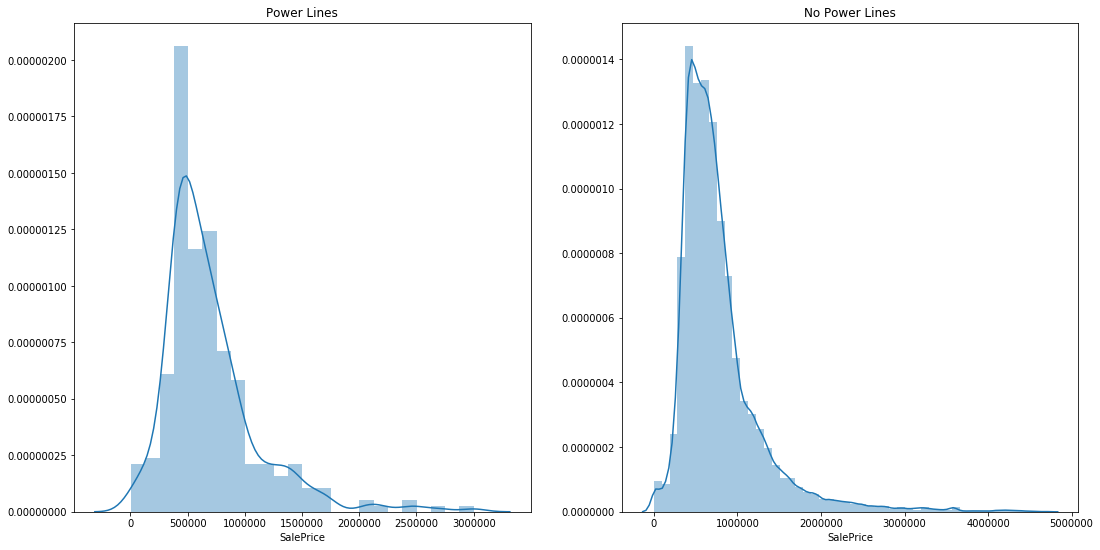

In [45]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

sns.distplot(pl.SalePrice, ax=ax[0])
ax[0].set_title('Power Lines')
sns.distplot(no_pl.SalePrice, ax=ax[1])
ax[1].set_title('No Power Lines')

## Conclusion

Only a small amount of homes from our data set have the nuisances cited in the claim. Because of this, it will be difficult to infer a correlation in the general population of homes.

In [56]:
for column in no_outliers.columns:
    print(column)

Unnamed: 0_x
ExciseTaxNbr
Major_x
Minor_x
DocumentDate
SalePrice
RecordingNbr
Volume
Page
PlatNbr
PlatType
PlatLot_x
PlatBlock_x
SellerName
BuyerName
PropertyType
PrincipalUse
SaleInstrument
AFForestLand
AFCurrentUseLand
AFNonProfitUse
AFHistoricProperty
SaleReason
PropertyClass
SaleWarning
PIN
Unnamed: 0_y
Major_y
Minor_y
PropName
PlatName
PlatLot_y
PlatBlock_y
Range
Township
Section
QuarterSection
PropType
Area
SubArea
SpecArea
SpecSubArea
DistrictName
LevyCode
CurrentZoning
HBUAsIfVacant
HBUAsImproved
PresentUse
SqFtLot
WaterSystem
SewerSystem
Access
Topography
StreetSurface
RestrictiveSzShape
InadequateParking
PcntUnusable
Unbuildable
MtRainier
Olympics
Cascades
Territorial
SeattleSkyline
PugetSound
LakeWashington
LakeSammamish
SmallLakeRiverCreek
OtherView
WfntLocation
WfntFootage
WfntBank
WfntPoorQuality
WfntRestrictedAccess
WfntAccessRights
WfntProximityInfluence
TidelandShoreland
LotDepthFactor
TrafficNoise
AirportNoise
PowerLines
OtherNuisances
NbrBldgSites
Contamination
DNRLe

In [58]:
no_outliers.OtherNuisances.value_counts()

N    27704
Y      888
Name: OtherNuisances, dtype: int64

In [60]:
nuisance = no_outliers[(no_outliers.TrafficNoise>=2)|(no_outliers.PowerLines == 'Y')]

nuisance

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
36,36,2992999,407320,60,2019-06-05,1495000,20190611001065,,,,...,N,N,N,N,N,N,N,N,N,N
62,62,2980797,637950,820,2019-03-20,675000,20190404000793,,,,...,N,N,N,N,N,N,N,N,N,N
90,90,2981429,872595,140,2019-04-04,1267555,20190409000897,,,,...,N,N,N,N,N,N,N,N,N,N
104,104,2983779,691805,70,2019-04-16,886846,,,,,...,N,N,N,N,N,N,N,N,N,N
135,135,2994581,390050,120,2019-06-18,737500,,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28719,28719,2982598,172304,9437,2019-03-07,550000,,,,,...,N,N,N,N,N,N,N,N,N,N
28723,28723,2985675,885692,380,2019-05-01,525000,,,,,...,N,N,N,N,N,N,N,N,N,N
28728,28728,2970466,618770,175,2019-01-14,610000,20190117000289,,,,...,N,N,N,N,N,N,N,N,N,N
28759,28759,3004977,572750,100,2019-05-08,3900,20190815000438,,,,...,N,N,N,N,N,N,N,N,N,N


In [61]:
no_nuisance = no_outliers[(no_outliers.TrafficNoise<2)&(no_outliers.PowerLines == 'N')]

no_nuisance

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,0,3027422,213043,120,2019-12-20,560000,20191226000848,,,,...,N,N,N,N,N,N,N,N,N,N
1,1,3002257,940652,630,2019-07-22,435000,20190730001339,,,,...,N,N,N,N,N,N,N,N,N,N
2,2,2993601,140281,20,2019-06-04,450000,20190614000489,,,,...,N,N,N,N,N,N,N,N,N,N
3,3,3015264,124550,98,2019-09-27,193000,20191015000395,,,,...,N,N,N,N,N,N,N,N,N,N
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28766,28766,2972689,929085,760,2019-01-25,1205000,20190206001611,,,,...,N,N,N,N,N,N,N,N,N,N
28767,28767,2992593,405940,95,2019-05-21,442000,20190607001670,,,,...,N,N,N,N,N,N,N,N,N,N
28768,28768,3003079,381670,25,2019-07-22,680000,20190802000628,,,,...,N,N,N,N,N,N,N,N,N,N
28769,28769,3025068,615020,505,2019-11-18,745000,20191212000602,,,,...,N,N,N,N,N,N,N,N,N,N


In [63]:
len(no_nuisance) + len(nuisance)

True

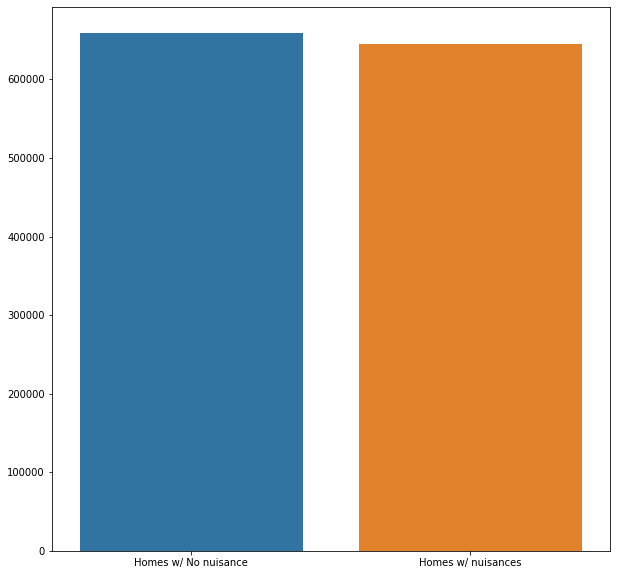

In [64]:
med = nuisance.SalePrice.median()
no_med = no_nuisance.SalePrice.median()

fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x=['Homes w/ No nuisance', 'Homes w/ nuisances'],y=[no_med, med], ax=ax)

Text(0.5, 1.0, 'No Nuisances')

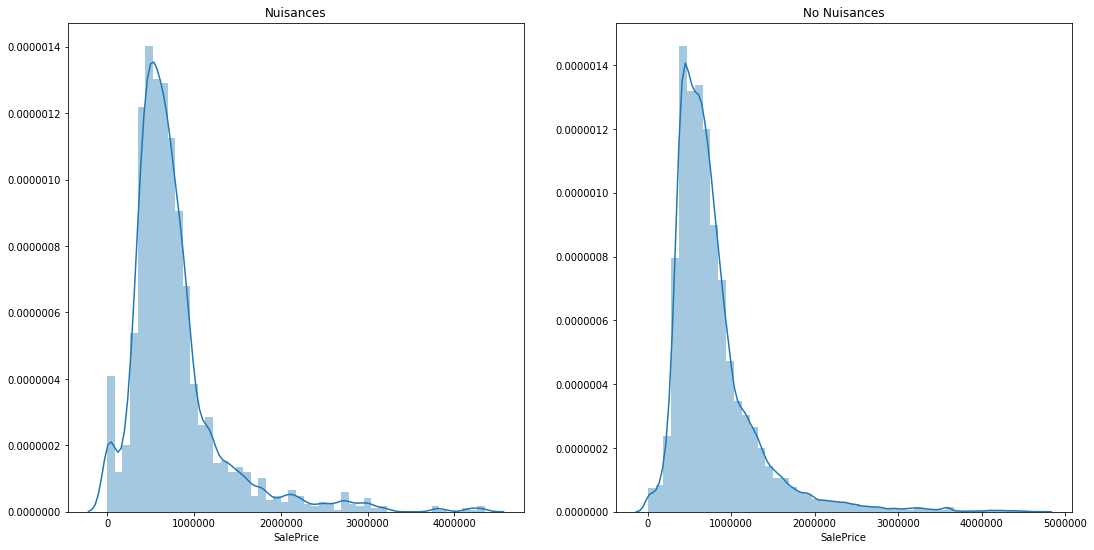

In [65]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

sns.distplot(nuisance.SalePrice, ax=ax[0])
ax[0].set_title('Nuisances')
sns.distplot(no_nuisance.SalePrice, ax=ax[1])
ax[1].set_title('No Nuisances')

In [66]:
nuisance = no_outliers[(no_outliers.TrafficNoise>=2)|(no_outliers.PowerLines == 'Y')|(no_outliers.OtherNuisances=='Y')]

nuisance

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
36,36,2992999,407320,60,2019-06-05,1495000,20190611001065,,,,...,N,N,N,N,N,N,N,N,N,N
62,62,2980797,637950,820,2019-03-20,675000,20190404000793,,,,...,N,N,N,N,N,N,N,N,N,N
64,64,2978015,276760,4707,2019-03-11,739888,20190319000261,,,,...,N,N,N,N,N,N,N,N,N,N
90,90,2981429,872595,140,2019-04-04,1267555,20190409000897,,,,...,N,N,N,N,N,N,N,N,N,N
104,104,2983779,691805,70,2019-04-16,886846,,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28727,28727,3006832,788360,8693,2019-08-10,337500,20190826001059,,,,...,N,N,N,N,N,N,N,N,N,N
28728,28728,2970466,618770,175,2019-01-14,610000,20190117000289,,,,...,N,N,N,N,N,N,N,N,N,N
28736,28736,3004579,433880,755,2019-08-07,225000,20190813000801,,,,...,N,N,N,N,N,N,N,N,N,N
28759,28759,3004977,572750,100,2019-05-08,3900,20190815000438,,,,...,N,N,N,N,N,N,N,N,N,N


In [67]:
no_nuisance = no_outliers[(no_outliers.TrafficNoise<2)&(no_outliers.PowerLines == 'N')&(no_outliers.OtherNuisances == 'N')]

no_nuisance

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,0,3027422,213043,120,2019-12-20,560000,20191226000848,,,,...,N,N,N,N,N,N,N,N,N,N
1,1,3002257,940652,630,2019-07-22,435000,20190730001339,,,,...,N,N,N,N,N,N,N,N,N,N
2,2,2993601,140281,20,2019-06-04,450000,20190614000489,,,,...,N,N,N,N,N,N,N,N,N,N
3,3,3015264,124550,98,2019-09-27,193000,20191015000395,,,,...,N,N,N,N,N,N,N,N,N,N
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28766,28766,2972689,929085,760,2019-01-25,1205000,20190206001611,,,,...,N,N,N,N,N,N,N,N,N,N
28767,28767,2992593,405940,95,2019-05-21,442000,20190607001670,,,,...,N,N,N,N,N,N,N,N,N,N
28768,28768,3003079,381670,25,2019-07-22,680000,20190802000628,,,,...,N,N,N,N,N,N,N,N,N,N
28769,28769,3025068,615020,505,2019-11-18,745000,20191212000602,,,,...,N,N,N,N,N,N,N,N,N,N


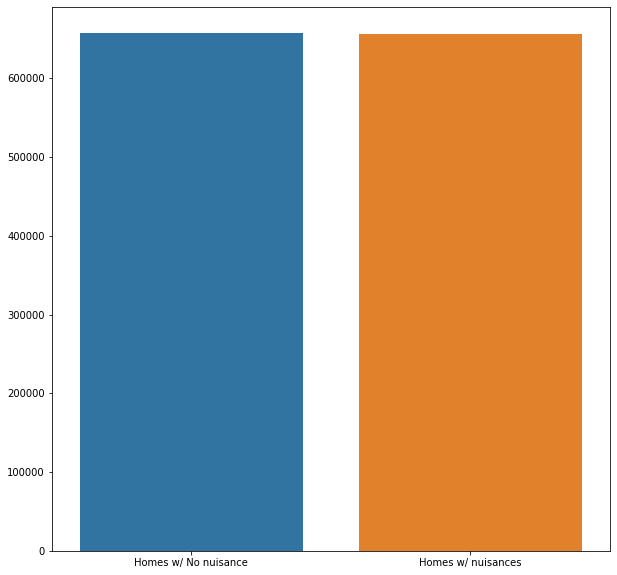

In [68]:
med = nuisance.SalePrice.median()
no_med = no_nuisance.SalePrice.median()

fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.barplot(x=['Homes w/ No nuisance', 'Homes w/ nuisances'],y=[no_med, med], ax=ax)

Text(0.5, 1.0, 'No Nuisances')

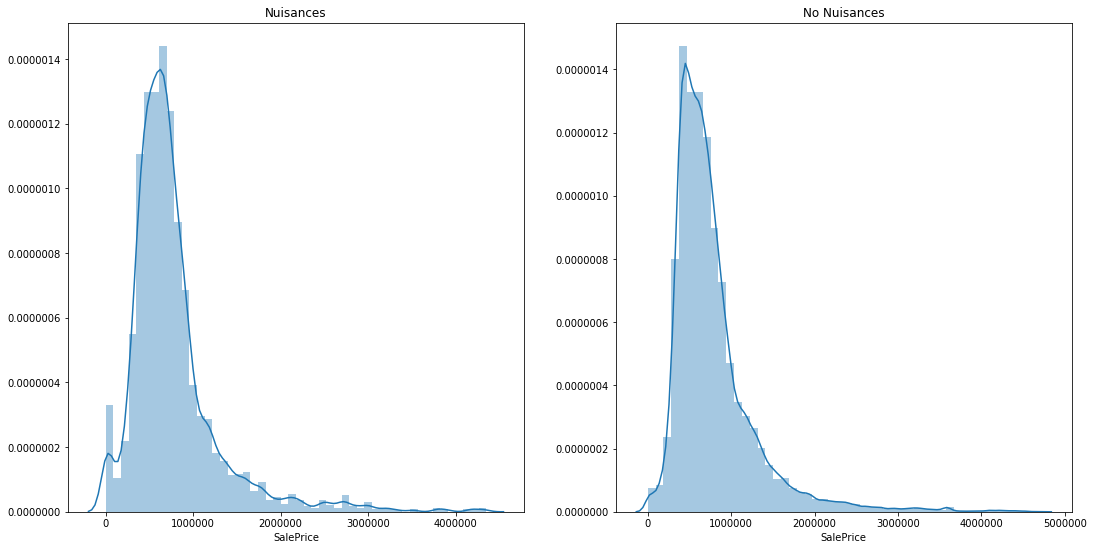

In [69]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

sns.distplot(nuisance.SalePrice, ax=ax[0])
ax[0].set_title('Nuisances')
sns.distplot(no_nuisance.SalePrice, ax=ax[1])
ax[1].set_title('No Nuisances')

In [70]:
no_outliers.SaleInstrument.value_counts()

3     27112
22      560
15      399
26      175
24      111
2        96
18       50
4        48
21       19
10        4
23        4
20        4
27        2
5         2
19        2
25        1
8         1
7         1
1         1
Name: SaleInstrument, dtype: int64